In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline


# Create 40 searable points 

In [6]:
# Create 40 separable points:
X, y = make_blobs(n_samples = 40, centers = 2, random_state = 6)

In [7]:
X.shape, y.shape

((40, 2), (40,))

In [8]:
print(X[:4,0], X[:4,1], y[:4])

[6.37734541 6.50072722 4.29225906 7.39169472] [-10.61510727  -3.82403586  -8.99220442  -3.1266933 ] [1 0 1 0]


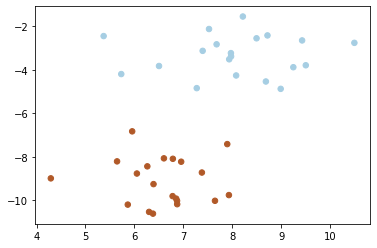

In [9]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)  # cmap is the colour map for c
plt.show()

In [10]:
# fit the model, without regularisation (make C large):
clf = svm.SVC(kernel = 'linear', C = 1000)
clf.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

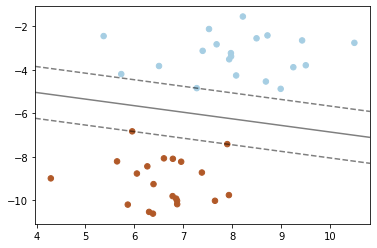

In [11]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 100, linewidth = 1, facecolors = 'none')
plt.show()

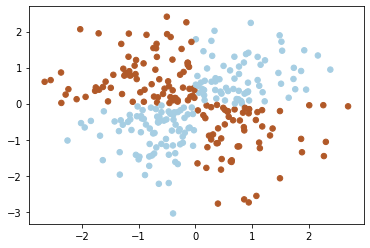

In [12]:
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)

In [13]:
# fit the model
clf = svm.NuSVC()
clf.fit(X, y)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

C:\Users\raham\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'linetypes'


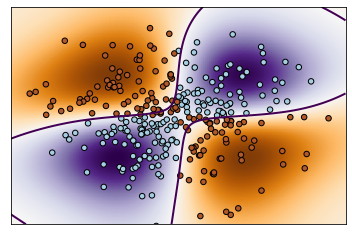

In [14]:
# Plot the decision function for each datapoint on the grid ...

# create a fine grid on which to calculate the function:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

# use ravel() to transform each array into 1 contiguous vector (row-wise or column-wise);
# then use c_[] to create an array with one column for each or these two vectors;
# then apply the decision_function() to compute the distance of each sample X to the separating hyperplane:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  

# finally, change the shape of the result back into that of the original grid:
Z = Z.reshape(xx.shape)  # put results back into original geometry

# plot Z as a heatmap:
plt.imshow(Z, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()), aspect = 'auto',
           origin = 'lower', cmap = plt.cm.PuOr_r)

# plot decision boundaries:
contours = plt.contour(xx, yy, Z, levels = [0], linewidths = 2, linetypes = '--')

# plot original data points:
plt.scatter(X[:, 0], X[:, 1], s = 30, c = y, cmap = plt.cm.Paired, edgecolors = 'k')

# scaling, final rendering:
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()